# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Azizah Amalia Azra
- **Email:** m001d4kx1465@bangkit.academy
- **ID Dicoding:** m001d4kx1465

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perbandingan jumlah peminjam untuk setiap harinya ?
- Pertanyaan 2 : Bagaimana perbandingan jumlah pengunjung untuk setiap season?
- Pertanyaan 3 : Bagaimana perbandingan jumlah pengunjung untuk setiap weathersit?
- Pertanyaan 4 : Bagaimana pengaruh tingkat humidity terhadap jumlah pengunjung?

## Import Semua Packages/Library yang Digunakan

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [102]:
# Replace 'your_file_id' with the actual file ID of your CSV file on Google Drive
file_id = '1BWdB_0RZU8ErTVPGWHiaIM2vC__B8wi8'

# Construct the file URL
file_url = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file from the URL
raw_df = pd.read_csv(file_url)

# Display the first few rows of the DataFrame
raw_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


### Assessing Data

Menilai Tabel data

In [103]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [70]:
print("Jumlah duplikasi: ", raw_df.duplicated().sum())

Jumlah duplikasi:  0


In [71]:
raw_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731
mean,366,2,1,7,0,3,1,1,0,0,1,0,848,3656,4504
std,211,1,1,3,0,2,0,1,0,0,0,0,687,1560,1937
min,1,1,0,1,0,0,0,1,0,0,0,0,2,20,22
25%,184,2,0,4,0,1,0,1,0,0,1,0,316,2497,3152
50%,366,3,1,7,0,3,1,1,0,0,1,0,713,3662,4548
75%,548,3,1,10,0,5,1,2,1,1,1,0,1096,4776,5956
max,731,4,1,12,1,6,1,3,1,1,1,1,3410,6946,8714


### Cleaning Data

In [72]:
#mengecek duplikasi
raw_df.duplicated().sum()

0

In [73]:
#mengecek missing value
raw_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [74]:
#merubah tipe data dteday
raw_df['dteday'] = pd.to_datetime(raw_df['dteday'])

## Exploratory Data Analysis (EDA)

In [104]:
raw_df.groupby(by=["holiday", "weekday"]).agg({
    "temp": "mean",
    "hum": "mean",
    "windspeed":"mean",
    "cnt": ["mean","min","max"]
})

temp  hum windspeed     cnt            
                mean mean      mean    mean   min   max
holiday weekday                                        
0       0       0.48 0.63      0.19 4228.83   605  8227
        1       0.50 0.64      0.19 4398.87    22  7525
        2       0.51 0.64      0.19 4544.62   683  7767
        3       0.50 0.65      0.19 4520.83   441  8173
        4       0.51 0.61      0.19 4720.34   431  7804
        5       0.50 0.61      0.18 4718.59  1167  8362
        6       0.48 0.62      0.20 4550.54   627  8714
1       1       0.48 0.63      0.20 3973.67  1000  6370
        2       0.29 0.73      0.17 1013.00  1013  1013
        3       0.79 0.54      0.13 7403.00  7403  7403
        4       0.36 0.56      0.11 1960.00  1495  2425
        5       0.39 0.56      0.27 3247.00  3126  3368

### Explore data raw_df berdasarkan hari

In [113]:
pivot_holiday = raw_df.groupby(by=["holiday"]).agg({
    "cnt": "mean"
}).reset_index()
pivot_weekday = raw_df.groupby(by=["weekday"]).agg({
    "cnt":"mean"
}).reset_index()
pivot_workingday = raw_df.groupby(by=["workingday"]).agg({
    "cnt": "mean"
}).reset_index()
pivot_holiday

,holiday,cnt
0,0,4527.10
1,1,3735.00


In [76]:
# Menampilkan pivot tabel
pd.options.display.float_format = '{:.0f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_holiday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari :")
print(pivot_weekday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari kerja :")
print(pivot_workingday.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
 holiday  cnt
       0 4527
       1 3735


Rata-rata jumlah peminjaman sepeda terhadap hari :
weekday  cnt          
        mean  min  max
      0 4229  605 8227
      1 4338   22 7525
      2 4511  683 7767
      3 4549  441 8173
      4 4667  431 7804
      5 4690 1167 8362
      6 4551  627 8714


Rata-rata jumlah peminjaman sepeda terhadap hari kerja :
workingday  cnt         
           mean min  max
         0 4330 605 8714
         1 4585  22 8362


### Explore data raw_df berdasarkan season

In [77]:
raw_df['season'] = raw_df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})


In [78]:
pivot_season = raw_df.groupby(by=["season"]).agg({
    "cnt": "mean"
}).reindex(season_order, fill_value=0).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.0f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_season.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
season  cnt
  Semi 2604
 Panas 4992
 Gugur 5644
Dingin 4728


### Explore data raw_df berdasarkan weathersit

In [81]:
raw_df['weathersit'] =raw_df['weathersit'].map({1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Lebat'})

In [100]:
pivot_weathersit = raw_df.groupby(by=["weathersit"]).agg({
    "cnt": "mean"
}).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.2f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_weathersit.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
 weathersit     cnt
          1 4876.79
          2 4035.86
          3 1803.29


### Explore data raw_df berdasarkan humidity

In [139]:
hum_df = raw_df[['hum','cnt']]
hum_df

,hum,cnt
0,0.81,985
1,0.70,801
2,0.44,1349
3,0.59,1562
4,0.44,1600
...,...,...
726,0.65,2114
727,0.59,3095
728,0.75,1341
729,0.48,1796


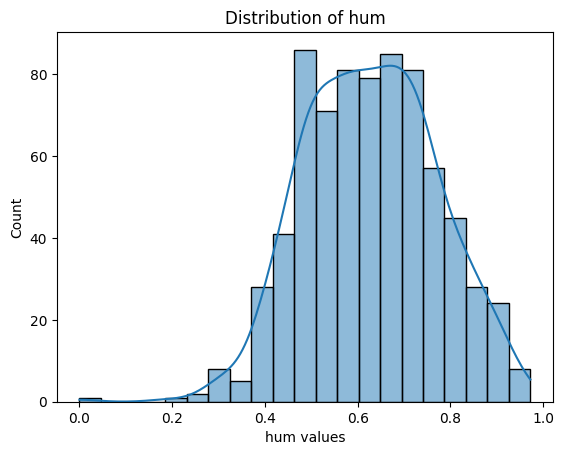

In [140]:
sns.histplot(data=hum_df['hum'], kde=True)
plt.title('Distribution of hum')
plt.xlabel('hum values')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah peminjam untuk setiap harinya

In [90]:
day_df= raw_df.groupby(by=["weekday"]).agg({
    "cnt": "mean"
}).reset_index()
day_df

,weekday,cnt
0,0,4229
1,1,4338
2,2,4511
3,3,4549
4,4,4667
5,5,4690
6,6,4551


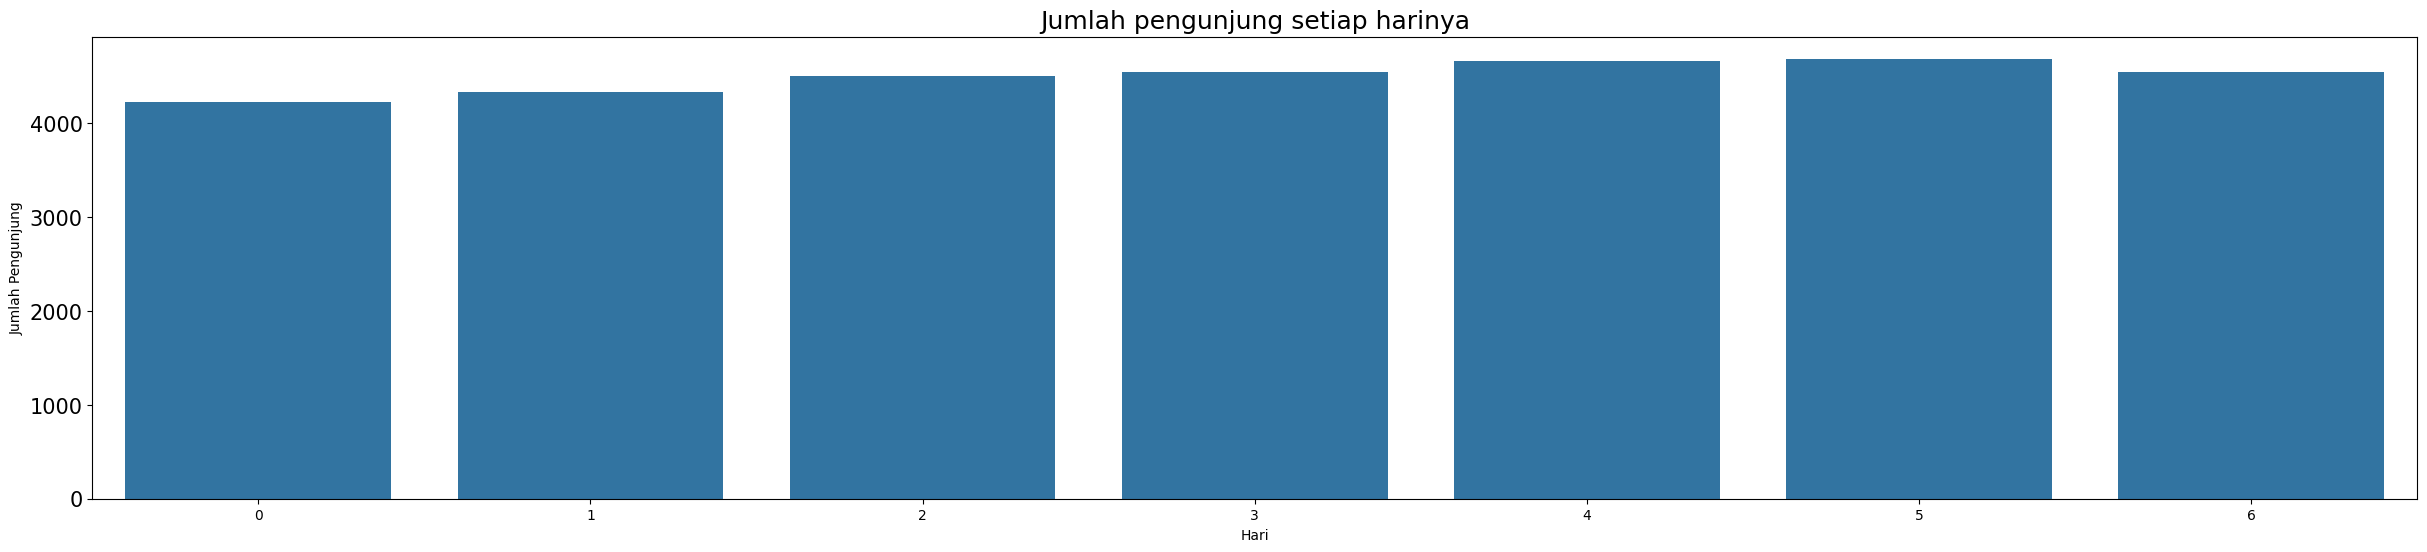

In [142]:
fig, ax = plt.subplots(nrows=1, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x='weekday', y='cnt', data=pivot_weekday.sort_values(by='cnt', ascending=False))
ax.set_ylabel("Jumlah Pengunjung")
ax.set_xlabel("Hari")
ax.set_title("Jumlah pengunjung setiap harinya", loc="center", fontsize=18)
ax.tick_params(axis ='y', labelsize=15)

plt.show()

### Pertanyaan 2:  Bagaimana perbandingan jumlah pengunjung untuk setiap season.

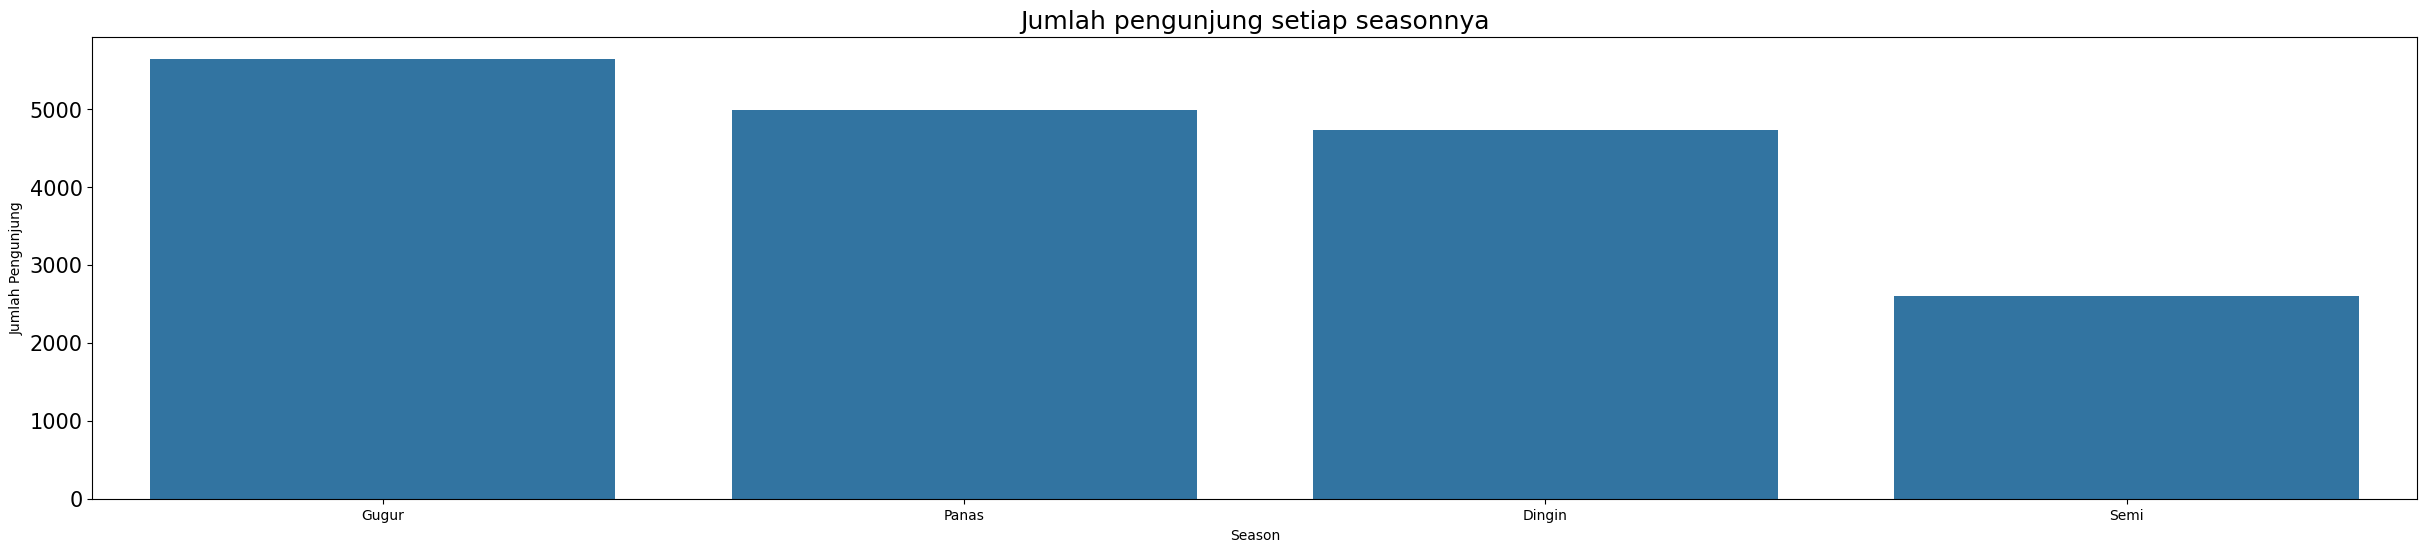

In [128]:
fig, ax = plt.subplots(nrows=1, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x='season', y='cnt', data=pivot_season.sort_values(by='cnt', ascending=False))
ax.set_ylabel("Jumlah Pengunjung")
ax.set_xlabel("Season")
ax.set_title("Jumlah pengunjung setiap seasonnya", loc="center", fontsize=18)
ax.tick_params(axis ='y', labelsize=15)

plt.show()

### Pertanyaan 3:  Bagaimana perbandingan jumlah pengunjung untuk setiap weathersit

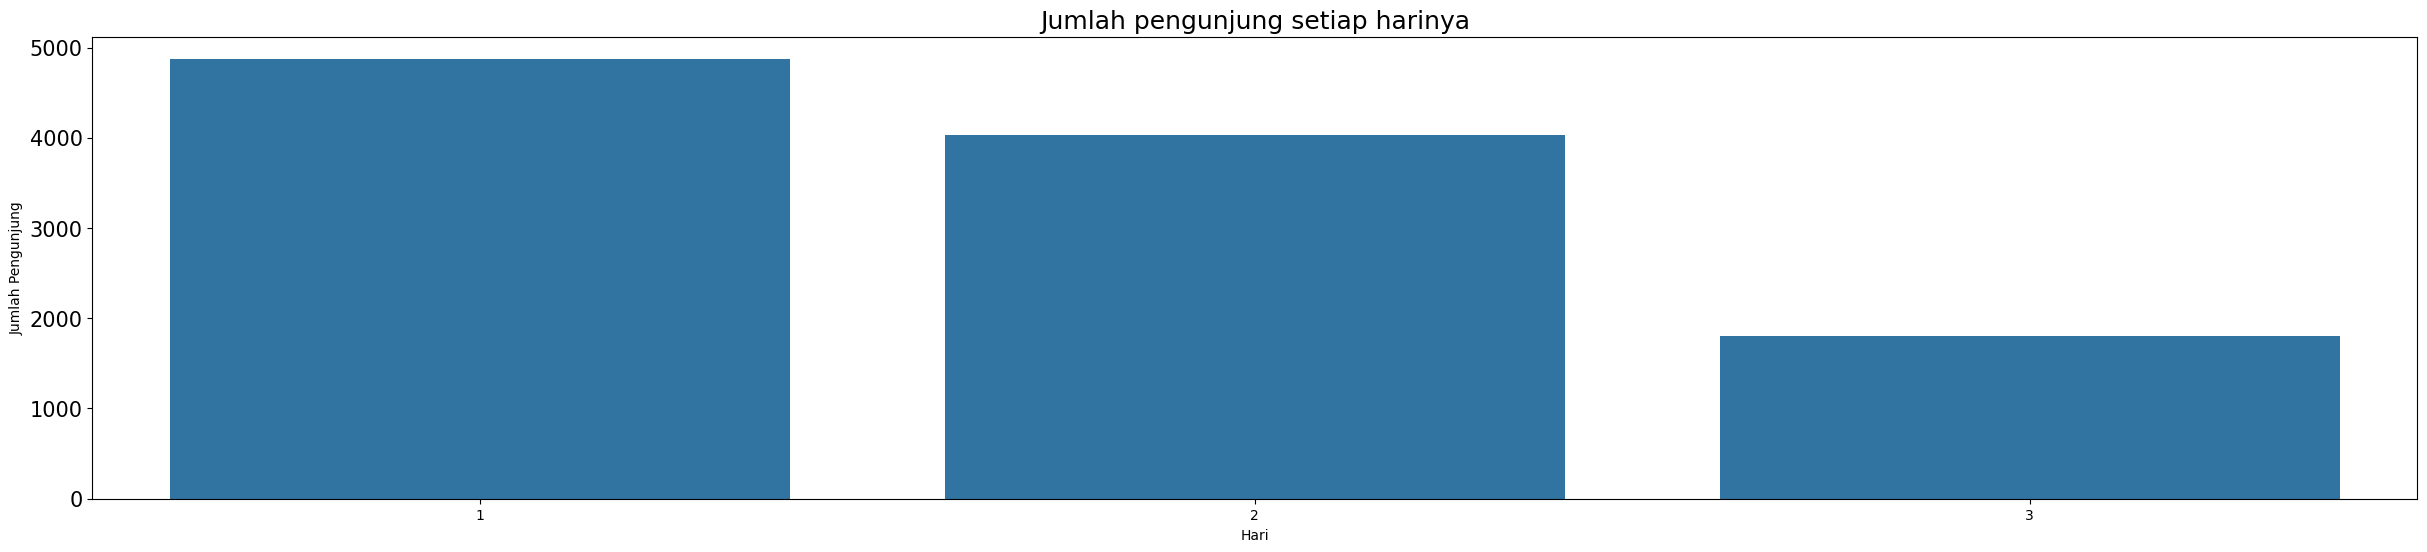

In [129]:
fig, ax = plt.subplots(nrows=1, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x='weathersit', y='cnt', data=pivot_weathersit.sort_values(by='cnt', ascending=False))
ax.set_ylabel("Jumlah Pengunjung")
ax.set_xlabel("Cuaca")
ax.set_title("Jumlah pengunjung setiap harinya", loc="center", fontsize=18)
ax.tick_params(axis ='y', labelsize=15)

plt.show()

 ** Pertanyaan 4 : Bagaimana pengaruh tingkat humidity terhadap jumlah pengunjung

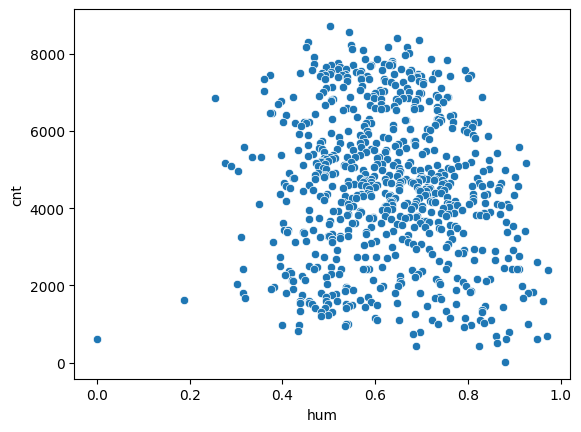

In [141]:
sns.scatterplot(x='hum', y='cnt', data=hum_df.sort_values(by='cnt', ascending=False))
plt.show()

## Conclusion

- Conclution pertanyaan 1
  
  Grafik menunjukkan tidak adanya perubahan yang cukup jauh antara hari. Jika diperhatikan, terdapat sedikit peningkatan dari hari 0 (minggu) ke hari 5 (jumat), lalu kembali turun pada hari 6 (sabtu)

- Conclution pertanyaan 2
  
  Peminjaman paling tinggi terjadi ketika musim gugur, lalu musim panas, musim dingin, dan paling rendah ada pada musim semi.

- Conclution pertanyaan 3

  Terdapat perbedaan yang cukup jauh antara setiap cuaca.
  Keterangan untuk setiap nilai adalah sebagai berikut.
  1: Clear, Few clouds, Partly cloudy, Partly cloudy

  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- Conclution pertanyaan 4
  Peminjaman menurun jauh ketika nilai humidity cukup rendah. Ketika humidity diatas 0.4 maka peminjaman mulai banyak dilakukan
